In [1]:
import numpy as np
from numpy import fft
from ROOT import *
import matplotlib.pyplot as plt

Welcome to JupyROOT 6.24/02


In [2]:
def rd_data(str):
    arr0=np.array([])
    for line in open(str):
        d=line.split()
        arr0=np.append(arr0,np.abs(float(d[0])))
    return arr0

filenames=['data.24.40.dat','data.29.40.dat','data.34.40.dat','data.39.40.dat','data.44.40.dat','data.49.40.dat',
          'data.54.40.dat','data.59.40.dat','data.64.40.dat','data.69.40.dat','data.74.40.dat','data.79.40.dat',
          'data.84.40.dat']
mean_value=np.array([])
rms_value=np.array([])
angle_value=np.array([])

for i in range (0,len(filenames)):
    mean_value=np.append(mean_value,rd_data(filenames[i]).mean())
    rms_value=np.append(rms_value,rd_data(filenames[i]).std())
    
for i in range (0,len(filenames)):
    angle_value=np.append(angle_value,float(filenames[i][5:-4])*np.pi/180)
    
print(mean_value,rms_value)
print(angle_value)

[1.82321195 1.7194992  1.64647055 1.5610316  1.46332625 1.25259455
 1.0277186  0.8179099  0.65372075 0.4523348  0.30839645 0.35597265
 1.06342965] [0.00347451 0.00924793 0.04475973 0.00894418 0.00734441 0.00326784
 0.00110046 0.00028621 0.00176041 0.00124756 0.00048493 0.0022237
 0.00234603]
[0.42586034 0.5131268  0.60039326 0.68765973 0.77492619 0.86219265
 0.94945911 1.03672558 1.12399204 1.2112585  1.29852496 1.38579143
 1.47305789]


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 2.98e+05 (chi2/ndof = 29799.8)│              Nfcn = 84               │
│ EDM = 2.59e-11 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───

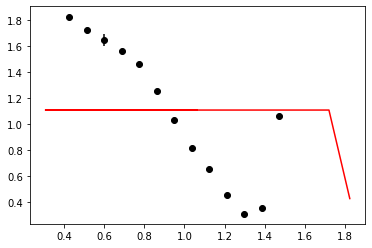

In [4]:
from iminuit import Minuit
from iminuit.cost import LeastSquares

def modelS(x, p):
    return p[1]*((np.sqrt(p[0]-(np.sin(x))**2)-np.cos(x))/(np.sqrt(p[0]-(np.sin(x))**2)+np.cos(x)))**2+p[2]

def modelP(x,p):
    return p[1]*((p[0]*np.cos(x)-np.sqrt(p[0]-np.sin(x)**2))/(p[0]*np.cos(x)+np.sqrt(p[0]-np.sin(x)**2)))**2+p[2]

fnc = LeastSquares(mean_value, angle_value, rms_value, modelP)
m = Minuit(fnc, (15, 4,0.2))
m.migrad()
print(m)

plt.errorbar(angle_value,mean_value,yerr=rms_value,color='black',fmt='o')
plt.plot(mean_value,modelP(mean_value,m.values),color='r')
plt.show()